### 📌 StandardScaler (Z-Score Normalization)

The `StandardScaler` is a feature scaling technique that transforms features so they have:

- Mean = 0
- Standard Deviation = 1

This is important for algorithms that assume all features are centered and have the same variance — like KNN, SVM, Logistic Regression, PCA, etc.

#### <u>Mathematical Formula</u>

For each feature $x$, the transformation is:

$$
z = \frac{x - \mu}{\sigma}
$$

Where:

- $x$: Original value  
- $\mu$: Mean of the feature  
- $\sigma$: Standard deviation of the feature  
- $z$: Standardized value

#### <u>When to Use `StandardScaler` ?</u>

- Data is normally distributed or approximately Gaussian  
- Algorithms are sensitive to scale (e.g., distance-based models)  
- Not recommended for sparse data → use `MaxAbsScaler`  
- Not ideal when outliers are present → prefer `RobustScaler`

#### ⚙️ <u>Effect on Data</u>

- Does **not** change the shape of the distribution  
- Only **centers** and **scales** the data:
  - Mean becomes **0**
  - Standard deviation becomes **1**  
  - Does **not** make the data bell-shaped if it wasn’t already


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble        import RandomForestRegressor
from sklearn.neighbors       import KNeighborsRegressor
from sklearn.svm             import SVR
from sklearn.pipeline        import Pipeline

To begin with, we shall experiment using the `load_wine` dataset to observe the effect of `StandardScaler` on features like `alcohol` and `proline`, which clearly differ in their value ranges.

In [3]:
from sklearn.datasets import load_wine

In [4]:
# Load data
wine = load_wine()
df   = pd.DataFrame(wine.data, columns=wine.feature_names)

In [5]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [6]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [7]:
# Apply StandardScaler to all features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=[f"{col}_scaled" for col in df.columns])

In [8]:
df_scaled

,alcohol_scaled,malic_acid_scaled,ash_scaled,alcalinity_of_ash_scaled,magnesium_scaled,total_phenols_scaled,flavanoids_scaled,nonflavanoid_phenols_scaled,proanthocyanins_scaled,color_intensity_scaled,hue_scaled,od280/od315_of_diluted_wines_scaled,proline_scaled
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


Now, let's apply `StandardScaler` to a more complex, real-world dataset: `fetch_california_housing`.

In [9]:
from sklearn.datasets import fetch_california_housing

In [10]:
X, y = fetch_california_housing(as_frame=True, return_X_y=True)
# features and target variable segregated

In [11]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
X.shape

(20640, 8)

In [13]:
X = X.iloc[:,:-2]

In [14]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [15]:
y.shape

(20640,)

In [16]:
# Descriptive statistics of the dataset
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333


In [17]:
# Data splitting
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
type(x_train)

pandas.core.frame.DataFrame

In [19]:
def plots(df, var, t):
  plt.figure(figsize=(13,5))
  plt.subplot(121)
  sns.kdeplot(df[var])
  plt.title('before '+ str(t).split('(')[0])

  plt.subplot(122)
  p1 = t.fit_transform(df[[var]]).flatten()
  sns.kdeplot(p1)
  plt.title('after '+ str(t).split('(')[0])

- `x_train[col]` → returns a **Series** (1D)
- `x_train[[col]]` → returns a **DataFrame** (2D), which is required by `StandardScaler`

So, always use double brackets when selecting a single column for Scikit-learn transformers.

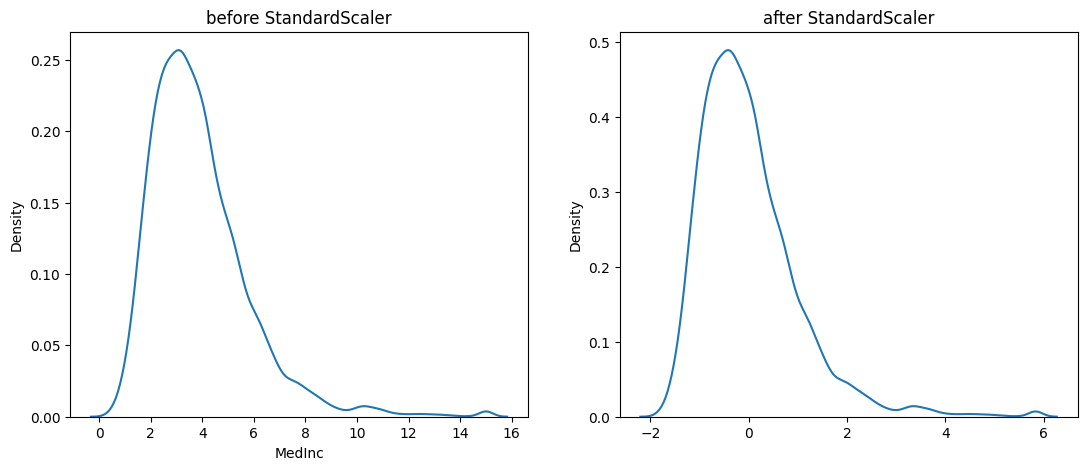

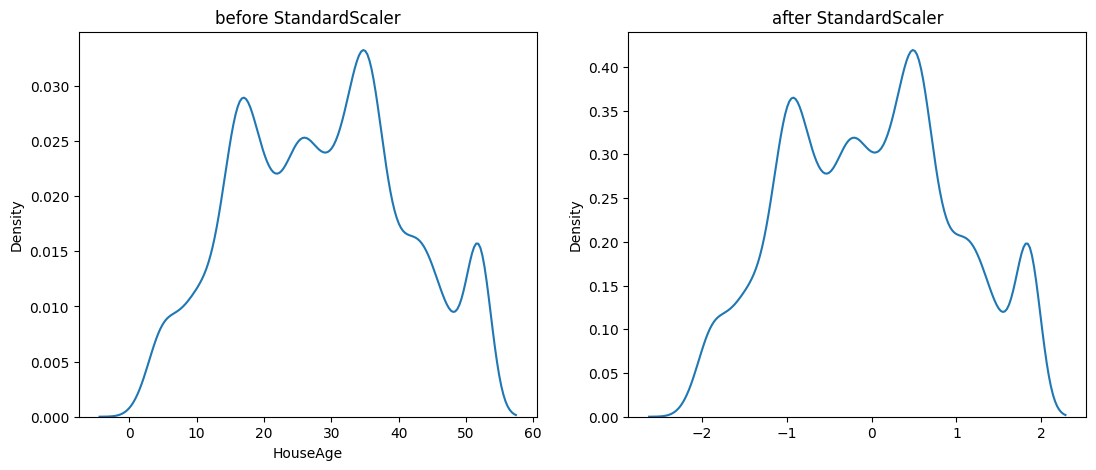

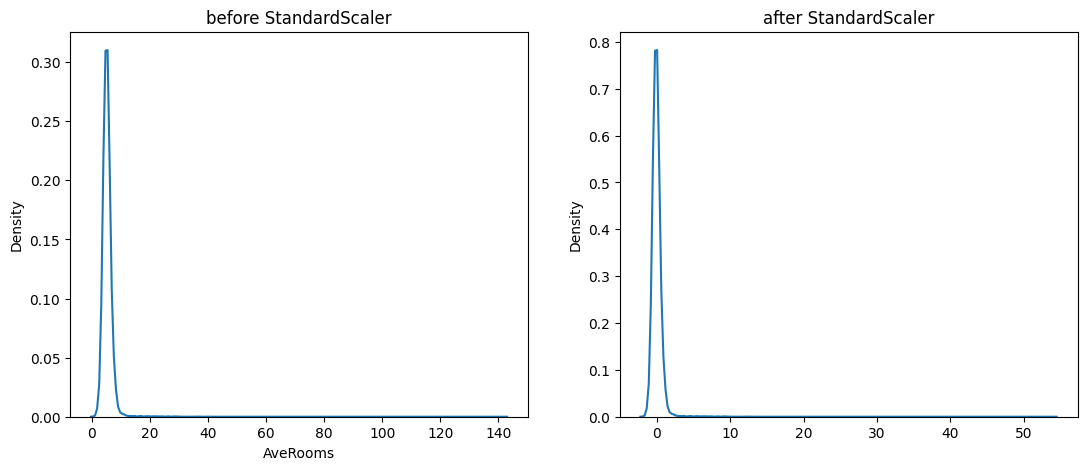

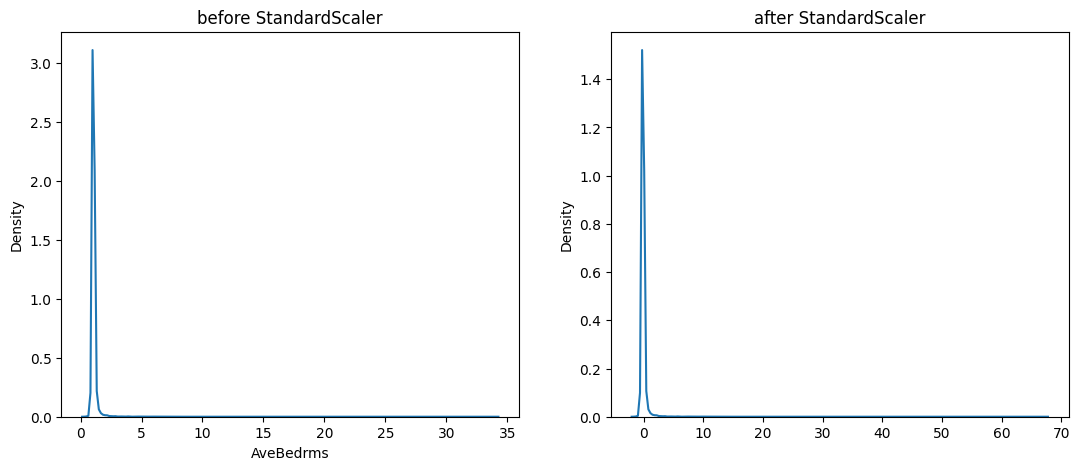

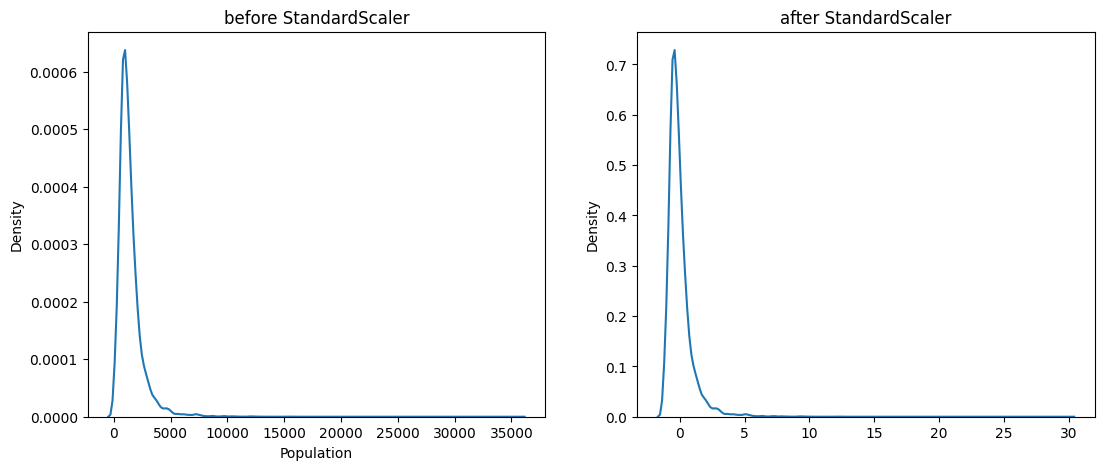

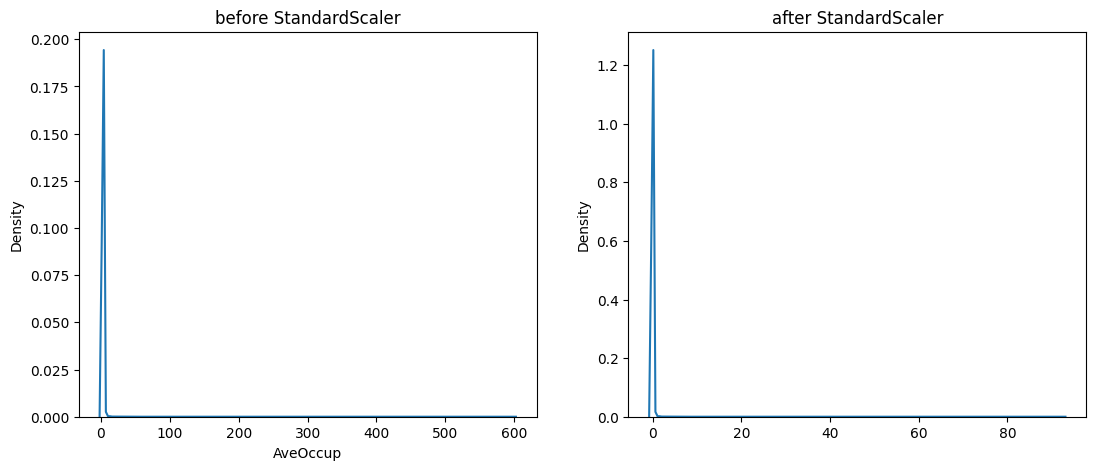

In [20]:
for col in x_train.columns:
  plots(x_train, col, StandardScaler())

<div align="justify">

To demonstrate the effect of feature scaling, we will use two regression models: **KNN Regressor** (Linear model) and **Random Forest Regressor** (Tree-based model).

We will evaluate both models on the `fetch_california_housing` dataset by comparing their performance (using `model.score`) on **Unscaled data** and **Scaled data** (after applying `StandardScaler`).

>The `.score()` method gives a quick evaluation metric for the trained model — but its meaning depends on the type of model: For Regressors, it returns the R² score (coefficient of determination) and for classifiers, it returns the accuracy_score.
</div>


In [21]:
def model_accuracy_scaled(mod):
  model_scaled = Pipeline([
      ('scale', StandardScaler()),
      ('model', mod)
  ])
  model_scaled.fit(x_train, y_train)
  return model_scaled.score(x_test, y_test)

def model_accuracy_unscaled(mod):
  model_unscaled = Pipeline([
      ('model', mod)
  ])
  model_unscaled.fit(x_train, y_train)
  return model_unscaled.score(x_test, y_test)

<span style="font-color:green;">KNN Regressor</span>

In [22]:
model_accuracy_unscaled(KNeighborsRegressor())

0.17191143873653625

KNN performs poorly on unscaled data because it is a **distance-based algorithm**. Features with larger ranges dominate the distance calculation, leading to biased results.

In [23]:
model_accuracy_scaled(KNeighborsRegressor())

0.5892398258820833

The performance improves significantly after scaling, as all features now contribute equally. This shows that **KNN is highly sensitive to feature scale**.

<span style="font-color:green;">Random Forest Regressor</span>

In [24]:
model_accuracy_scaled(RandomForestRegressor(random_state=0))

0.6687911343878328

In [25]:
model_accuracy_unscaled(RandomForestRegressor(random_state=0))

0.6688242918489945

There is **little to no difference** in R² scores. This is expected, as Random Forest is a **tree-based model**, which **does not rely on distance or feature scale**. It splits based on thresholds and feature importance.

### Conclusion:

Scaling is crucial for distance-based algorithms like KNN, SVM, Logistic Regression, Linear Regression etc. Whereas for tree-based models (like Random Forest, Decision Trees, XGBoost), scaling is not necessary and has negligible impact.